##### Importing relevant libraries

In [11]:
# Import required libraries
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

##### Initialising Dataset

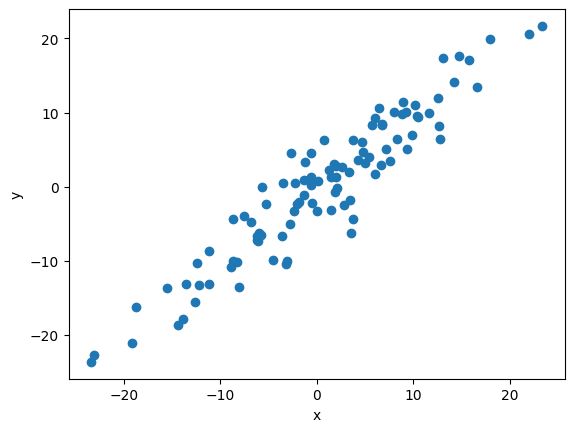

In [12]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

##### Linear Regression Class

In [13]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred

##### Model Instantiation

In [14]:
# Setting random seed for reproducibility
torch.manual_seed(1)

model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


##### Extracting Model Parameters

In [15]:
[w, b] = model.parameters()
print(w, b)
def get_params():
    return (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


##### Defining plot_fit function

In [16]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

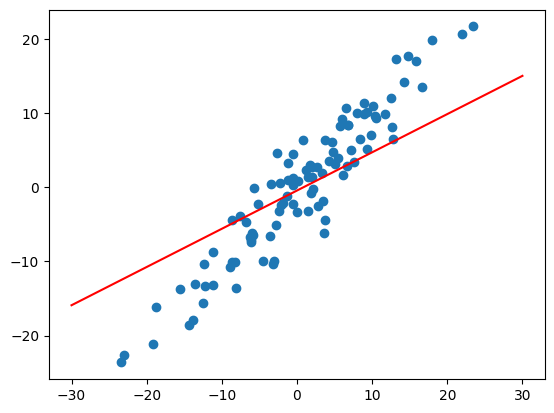

In [17]:
plot_fit('Initial Model')

##### Specifying Loss and Optimizer

In [18]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

##### Training Model

In [19]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 28.914575576782227
epoch: 1 loss: 20.61296844482422
epoch: 2 loss: 15.965326309204102
epoch: 3 loss: 13.363329887390137
epoch: 4 loss: 11.906599044799805
epoch: 5 loss: 11.091031074523926
epoch: 6 loss: 10.634418487548828
epoch: 7 loss: 10.378767013549805
epoch: 8 loss: 10.23561954498291
epoch: 9 loss: 10.155462265014648
epoch: 10 loss: 10.110568046569824
epoch: 11 loss: 10.085415840148926
epoch: 12 loss: 10.071319580078125
epoch: 13 loss: 10.063411712646484
epoch: 14 loss: 10.058968544006348
epoch: 15 loss: 10.056467056274414
epoch: 16 loss: 10.055052757263184
epoch: 17 loss: 10.054245948791504
epoch: 18 loss: 10.053783416748047
epoch: 19 loss: 10.053510665893555
epoch: 20 loss: 10.053346633911133
epoch: 21 loss: 10.053242683410645
epoch: 22 loss: 10.053174018859863
epoch: 23 loss: 10.053123474121094
epoch: 24 loss: 10.053086280822754
epoch: 25 loss: 10.053055763244629
epoch: 26 loss: 10.053028106689453
epoch: 27 loss: 10.05300521850586
epoch: 28 loss: 10.05298233032226

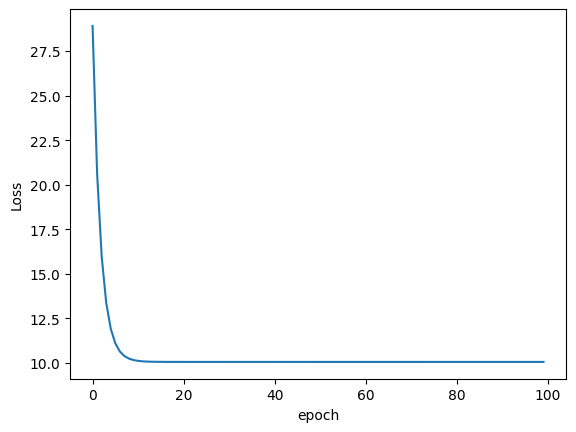

In [20]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

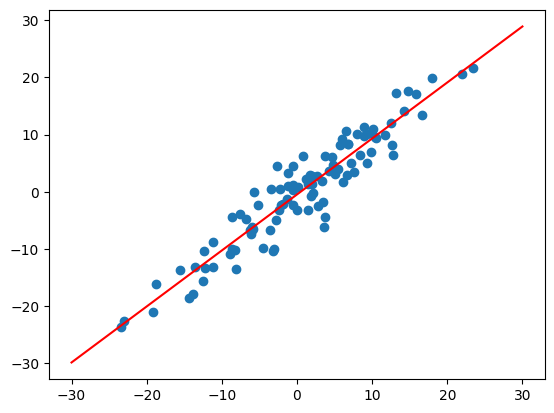

In [21]:
plot_fit('Trained Model')